<a href="https://colab.research.google.com/github/fergalll/Computer-Science/blob/main/eSportsEarnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set contains information on the earnings of professional esports players from around the world. Esports, or electronic sports, refers to competitive video gaming, which has exploded in popularity in recent years. With the rise of streaming platforms and major esports tournaments, the top esports players can earn millions of dollars in prize money and sponsorships. This data set includes information on earnings from over 10,000 players across various games, including Dota 2, League of Legends, and Fortnite, among others. This program aims to explore and analyze this data set to gain insights into the world of esports and the players who compete at the highest levels.



The data has been taken from Kaggle https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game

Importing pandas allows me to use all of the functionalities of the tool.
I created a variable called df or 'data frame' and imported the csv file containing the data.
I then imported matplotlib as it allows me to visualize the data.
Seaborn is a useful tool built ontop of pandas to further visualize data.
I imported numpy because it is a useful tool when perfomring A wide variety of mathematical operations on arrays.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('highest_earning_teams[1].csv')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter #The FuncFormatter gives you a flexible way to define your own tick label formatting to an axis.
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

.shape gives us a nice understanding of the size of the data set we are working with

In [ ]:
df.shape

(928, 6)

Creating a visulization for the data to show the first 6 the column headers.

In [ ]:
df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


The .describe funtion shows the average, standard deviation and quartile ranges of the data set.

In [ ]:
df.describe()

,TeamId,TotalUSDPrize,TotalTournaments
count,928.000000,9.280000e+02,928.000000
mean,3836.927802,5.399183e+05,31.696121
std,8438.383941,1.902399e+06,61.075848
min,101.000000,1.750000e+02,1.000000
25%,227.000000,3.915000e+04,4.000000
50%,529.000000,1.165306e+05,11.000000
75%,789.000000,3.231491e+05,33.000000
max,24997.000000,3.381064e+07,808.000000


.columns extracts the names of each header

In [ ]:
df.columns

Index(['TeamId', 'TeamName', 'TotalUSDPrize', 'TotalTournaments', 'Game',
       'Genre'],
      dtype='object')

.dtypes shows us the type of data each of our columns are.


In [ ]:
df.dtypes

TeamId                int64
TeamName             object
TotalUSDPrize       float64
TotalTournaments      int64
Game                 object
Genre                object
dtype: object

We can now extract all the data from just Fortnite to refine our analysis

In [ ]:
fortnite_df = df[df['Game'].str.contains("Fortnite")] #creating a new variable called fortnite_df to call upon as our new data frame to analyze ONLY data related to fortnite
fortnite_df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
300,571,Lazarus,3708150.00,24,Fortnite,Battle Royale
301,24684,Cooler Esport,3299864.26,27,Fortnite,Battle Royale
302,24687,Sentinels,3166116.68,20,Fortnite,Battle Royale
303,787,100 Thieves,2197413.68,36,Fortnite,Battle Royale
304,240,FaZe Clan,2118743.79,77,Fortnite,Battle Royale
...,...,...,...,...,...,...
395,24987,Granit Gaming,2600.00,3,Fortnite,Battle Royale
396,837,War Legend,2128.81,3,Fortnite,Battle Royale
397,24995,vsBANDITS,2000.00,1,Fortnite,Battle Royale
398,829,Winstrike Team,1500.00,1,Fortnite,Battle Royale


This line checks what type of data we are dealing with

In [ ]:
#type(df['TeamName'][300])
type(df['TotalUSDPrize'])

pandas.core.series.Series

This program creates a histogram contaning the top 50 highest earning fortnite teams

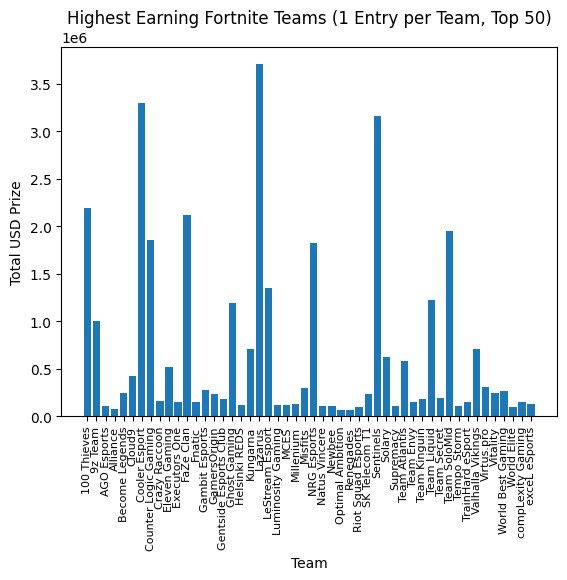

In [ ]:
fortnite_top50_df = fortnite_df.nlargest(50, 'TotalUSDPrize')

#Create a new DataFrame with only the highest earned data for each team
fortnite_highest_df = fortnite_top50_df.groupby('TeamName').agg({'TotalUSDPrize': 'max'}).reset_index()

# Create a bar chart 
plt.bar(fortnite_highest_df['TeamName'], fortnite_highest_df['TotalUSDPrize']) # creating a bar chart using the teamnames then totalusdprize
plt.xlabel('Team')
plt.ylabel('Total USD Prize')
plt.title('Highest Earning Fortnite Teams (1 Entry per Team, Top 50)')
plt.xticks(rotation=90, fontsize=8) #rotating the teamnames to you can see all of them
plt.show()

I plotted the top 10 most succesful teams against the amount of prize money that they won. I can then use the data for the most successful team to find what game they made the most money off of.

<ipython-input-13-209a8e6e089e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_totals = df.groupby('TeamName').sum()['TotalUSDPrize'].sort_values(ascending=False).head(10)


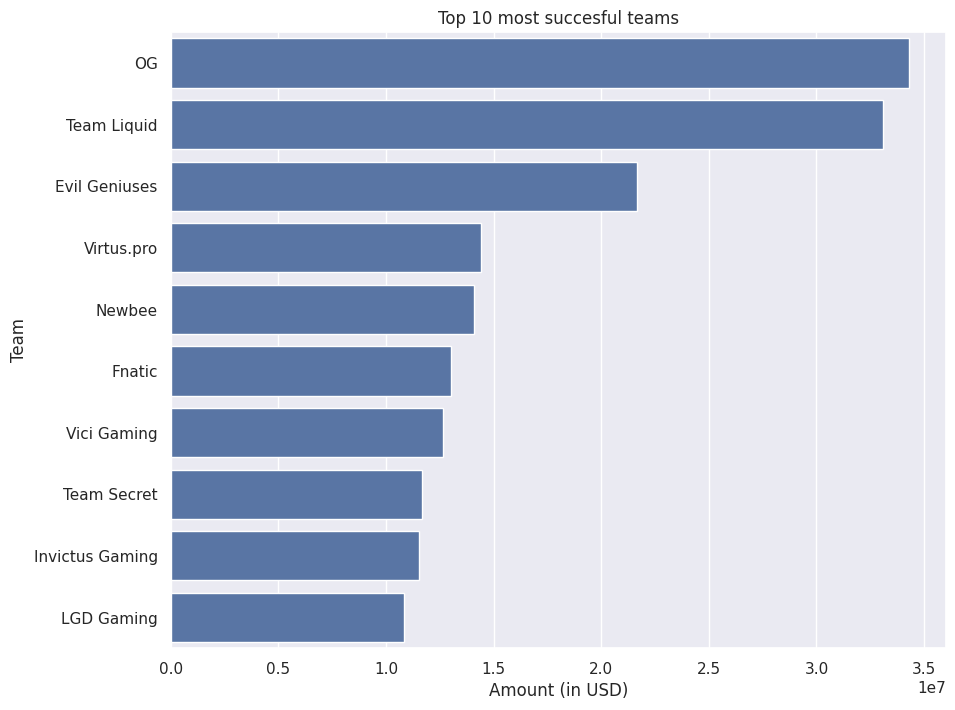

In [ ]:
team_totals = df.groupby('TeamName').sum()['TotalUSDPrize'].sort_values(ascending=False).head(10)

# Create a horizontal bar chart using Seaborn
sns.set(style='darkgrid')
sns.set_color_codes() #default colour code is blue
plt.figure(figsize=(10, 8))
sns.barplot(x=team_totals, y=team_totals.index, color='b')
plt.xlabel('Amount (in USD)')
plt.ylabel('Team')
plt.title('Top 10 most succesful teams')
plt.show()

This programme compares the top two earning games for the team 'OG' as they had earned the most from tournaments.

<ipython-input-14-44b4e2070e45>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_game_totals = df.groupby(['TeamName', 'Game']).sum()['TotalUSDPrize'].reset_index()


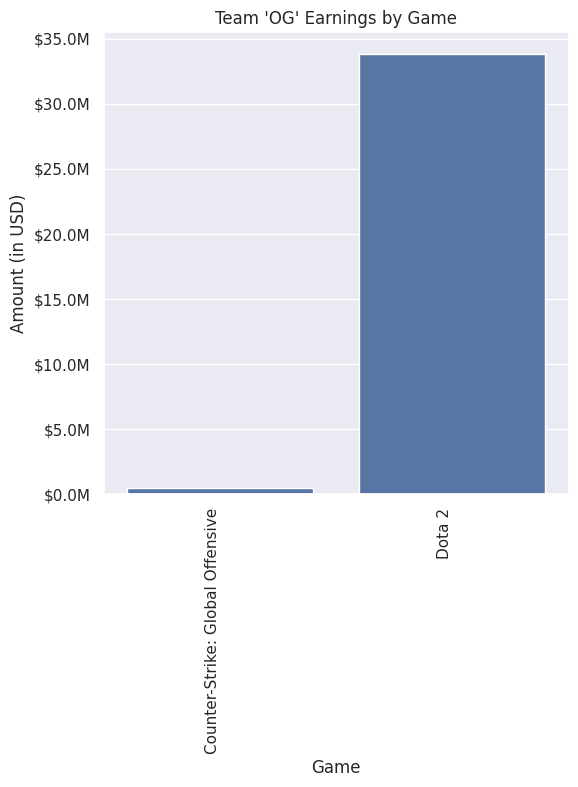

In [ ]:
# Define a function to format tick labels in millions
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'#this expression changes the raw value of for example 20,000,000 to simply $20.0M
team_game_totals = df.groupby(['TeamName', 'Game']).sum()['TotalUSDPrize'].reset_index()

# Filter the data to only include earnings for team 'OG'
og_game_totals = team_game_totals[team_game_totals['TeamName'] == 'OG']

# Create a vertical bar chart using Seaborn
sns.set(style='darkgrid')
sns.set_color_codes()
plt.figure(figsize=(6, 6))

sns.barplot(x=og_game_totals['Game'], y=og_game_totals['TotalUSDPrize'], color='b')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Amount (in USD)')
plt.xlabel('Game')
plt.title("Team 'OG' Earnings by Game")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter)) #I changed the y axis to USD in the millions using the millions formatter to make it clearer to read 
                                                                       #before it was just going up in 0.5 intervals as seen in the first graph.
plt.show()


This scatter plot diagram predicts (based on a line of best fit) when you chose an value for x what y value will be outputted in return. For example 50 tournaments played yeilds a total of $2.5 million USD generated from fortnite winnings from every team.

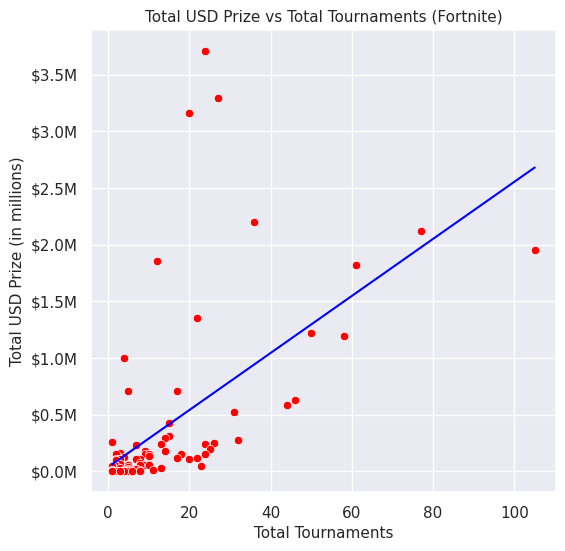

In [ ]:
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'
fortnite_data = df.loc[df['Game'] == 'Fortnite', ['TotalUSDPrize', 'TotalTournaments']].dropna()


# Create the linear regression model
model = LinearRegression()
model.fit(fortnite_data['TotalTournaments'].values.reshape(-1, 1), fortnite_data['TotalUSDPrize'])

# Predict the TotalUSDPrize using the TotalTournaments
fortnite_data['PredictedTotalUSDPrize'] = model.predict(fortnite_data['TotalTournaments'].values.reshape(-1, 1))

# Visualize the regression model using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(6, 6))
sns.scatterplot(x='TotalTournaments', y='TotalUSDPrize', data=fortnite_data, color='red')
sns.lineplot(x='TotalTournaments', y='PredictedTotalUSDPrize', data=fortnite_data, color='blue')
plt.title('Total USD Prize vs Total Tournaments (Fortnite)', fontsize=11)
plt.xlabel('Total Tournaments', fontsize=11)
plt.ylabel('Total USD Prize (in millions)', fontsize=11)

# Use the millions_formatter function to format the y-axis ticks
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()

I hope you have gained some valuable insights into the world of professional gaming and the impressive earnings of its top teams. Through our analysis, we have seen the vasts amount of money earned by. With the continued growth of the industry, we can expect to see even more talented teams and even larger prize pools in the future. We hope this program has been informative and has sparked your interest in the exciting world of esports. Thank you.